In [1]:
#import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Housing.csv")
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [3]:
X = df['area'].values
Y = df['price'].values


In [4]:
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)



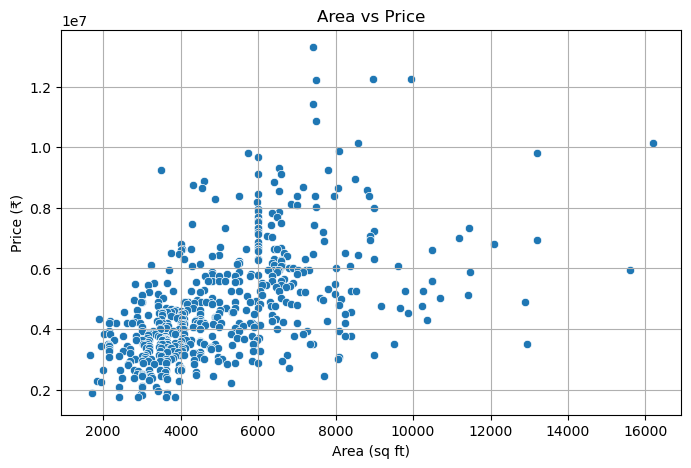

In [5]:
# Step 3: Visualize the data
plt.figure(figsize=(8,5))
sns.scatterplot(x=X.flatten(), y=Y.flatten())
plt.title("Area vs Price")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price (₹)")
plt.grid(True)
plt.show()

In [ ]:
# linear regression
mean_x = np.mean(X)
mean_y = np.mean(Y)
numerator = np.sum((X - mean_x) * (Y - mean_y))
denominator = np.sum((X - mean_x) ** 2)
m = numerator / denominator
c = mean_y - m * mean_x
print(f"Calculated Coefficients:\n"
      f"m (slope):     {m:.4f}\n"
      f"c (intercept): {c:.4f}")



Calculated Coefficients:
m (slope):     461.9749
c (intercept): 2387308.4824


In [14]:
Y_pred = m * X + c

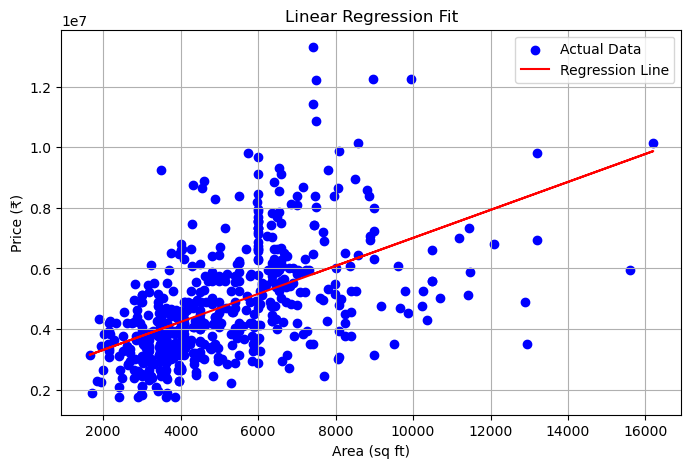

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(X, Y, color="blue", label="Actual Data")
plt.plot(X, Y_pred, color="red", label="Regression Line")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price (₹)")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Mean Squared Error (MSE)
mse = np.mean((Y - Y_pred) ** 2)

# R² Score
ss_total = np.sum((Y - mean_y) ** 2)
ss_res = np.sum((Y - Y_pred) ** 2)
r2_score = 1 - (ss_res / ss_total)
print(f"Model Evaluation:\n"
      f"  Mean Squared Error: {mse:.2f}\n"
      f"  R² Score:           {r2_score:.4f}")


Model Evaluation:
  Mean Squared Error: 2488861398180.66
  R² Score:           0.2873


In [20]:
new_area = np.array([3000])   # shape (1,)
predicted_price = m * new_area + c   # still shape (1,)
print(f"Predicted price for {new_area[0]} sq ft area: ₹{predicted_price[0]:.2f}")


Predicted price for 3000 sq ft area: ₹3773233.17


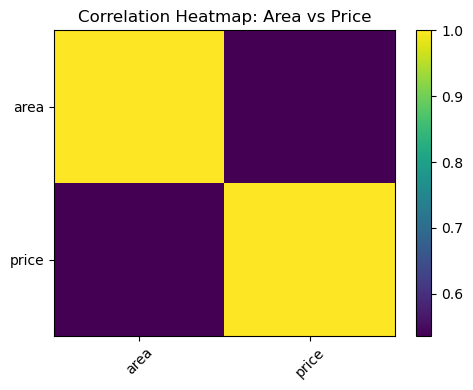

In [21]:
corr1 = df[["area", "price"]].corr()

plt.figure(figsize=(5, 4))
plt.imshow(corr1, interpolation="nearest", aspect="auto")
plt.colorbar()
plt.xticks([0, 1], corr1.columns, rotation=45)
plt.yticks([0, 1], corr1.index)
plt.title("Correlation Heatmap: Area vs Price")
plt.tight_layout()
plt.show()